# Use of Google Youtube Analytics API for Analysis of my favourite 5 youtube channels that helped me during my college life

In [1]:
pip install google-api-python-client 


Note: you may need to restart the kernel to use updated packages.


## My favourite 5 youtube channels for college subjects 
<ol>
<li> 5MinEngineering-------->UCyHta2dyCTkf29AB67AYn7A 
<li> GateSmashers----------->UCJihyK0A38SZ6SdJirEdIOw
<li> NesoAcademy------------>UCQYMhOMi_Cdj1CEAU-fv80A
<li> Education4U------------>UCKS34cSMNaXaySe2xgXH-3A
<li> KnowledgeGate---------->UCA6yfpYhy5sWMjRGOT-OAIQ
</ol>

In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [3]:
api_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'
channel_ids = ["UCyHta2dyCTkf29AB67AYn7A","UCJihyK0A38SZ6SdJirEdIOw","UCQYMhOMi_Cdj1CEAU-fv80A","UCKS34cSMNaXaySe2xgXH-3A","UCA6yfpYhy5sWMjRGOT-OAIQ"]

### Getting credentials using api key to setup Youtube service

In [4]:
youtube = build("youtube",'v3', developerKey = api_key)


### Defining a function to make service calls

In [5]:
def get_channel_details(youtube,channel_id):
    all_data= []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= channel_ids
    )
    response = request.execute()
    for i in range(len(response['items'])):
    
        data = dict(Channel_Name=response['items'][i]['snippet']['title'], Views_Count = response['items'][i]['statistics']['viewCount'],Subscriber_Count = response['items'][i]['statistics']['subscriberCount'],videos_posted = response['items'][i]['statistics']['videoCount']
                    ,playlist_id= response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    return all_data


In [6]:
Channel_Statistics=get_channel_details(youtube,channel_ids)

### Creating a data frame to perform analysis


In [7]:
channel_data = pd.DataFrame(Channel_Statistics)

In [8]:
channel_data

,Channel_Name,Views_Count,Subscriber_Count,videos_posted,playlist_id
0,5 Minutes Engineering,38452090,306000,1399,UUyHta2dyCTkf29AB67AYn7A
1,Education 4u,113774880,631000,2564,UUKS34cSMNaXaySe2xgXH-3A
2,KNOWLEDGE GATE,86252607,526000,1210,UUA6yfpYhy5sWMjRGOT-OAIQ
3,Gate Smashers,139603930,861000,974,UUJihyK0A38SZ6SdJirEdIOw
4,Neso Academy,315117024,1580000,2211,UUQYMhOMi_Cdj1CEAU-fv80A


In [9]:
channel_data.dtypes

Channel_Name        object
Views_Count         object
Subscriber_Count    object
videos_posted       object
playlist_id         object
dtype: object

In [10]:
channel_data['Subscriber_Count'] = pd.to_numeric(channel_data['Subscriber_Count'])
channel_data['Views_Count'] = pd.to_numeric(channel_data['Views_Count'])
channel_data['videos_posted'] = pd.to_numeric(channel_data['videos_posted'])




In [11]:
channel_data.dtypes

Channel_Name        object
Views_Count          int64
Subscriber_Count     int64
videos_posted        int64
playlist_id         object
dtype: object

In [12]:
channel_data.sort_values("Views_Count")

,Channel_Name,Views_Count,Subscriber_Count,videos_posted,playlist_id
0,5 Minutes Engineering,38452090,306000,1399,UUyHta2dyCTkf29AB67AYn7A
2,KNOWLEDGE GATE,86252607,526000,1210,UUA6yfpYhy5sWMjRGOT-OAIQ
1,Education 4u,113774880,631000,2564,UUKS34cSMNaXaySe2xgXH-3A
3,Gate Smashers,139603930,861000,974,UUJihyK0A38SZ6SdJirEdIOw
4,Neso Academy,315117024,1580000,2211,UUQYMhOMi_Cdj1CEAU-fv80A


<AxesSubplot:xlabel='Channel_Name', ylabel='Views_Count'>

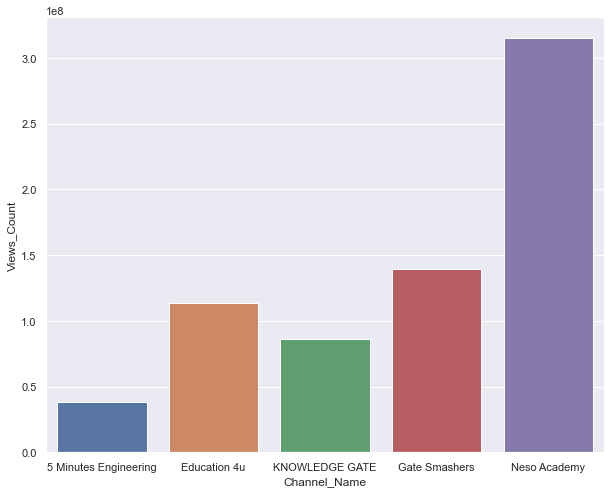

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='Channel_Name',y='Views_Count',data =channel_data)

<AxesSubplot:xlabel='Channel_Name', ylabel='Subscriber_Count'>

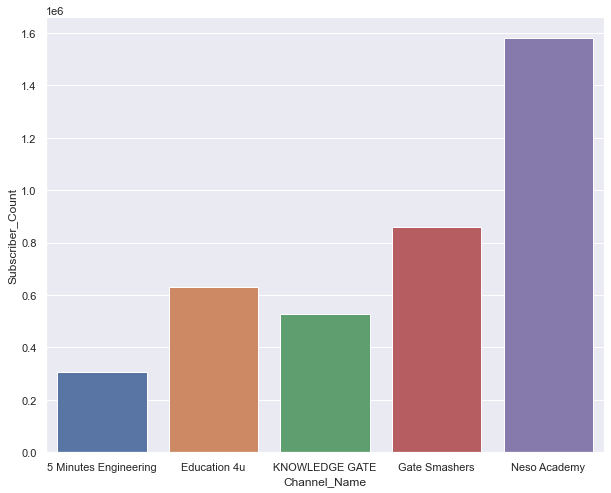

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='Channel_Name',y='Subscriber_Count',data =channel_data)

<AxesSubplot:xlabel='Channel_Name', ylabel='videos_posted'>

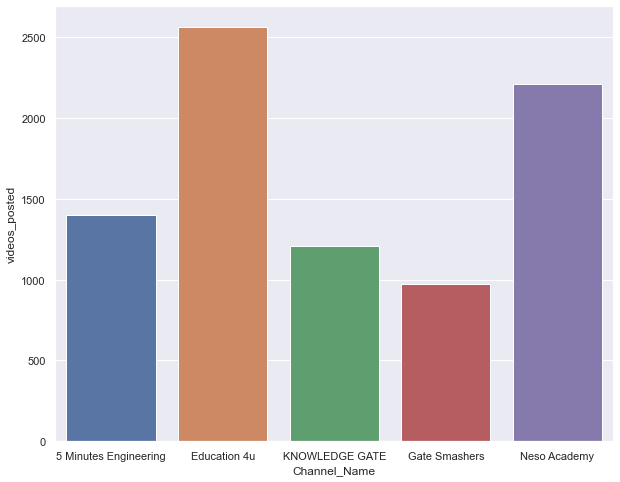

In [15]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='Channel_Name',y='videos_posted',data =channel_data)

### Deep Diving into "Neso Academy" Statistics as it has highest number of subscribers and views count

In [16]:
playlist_id = channel_data.loc[channel_data['Channel_Name']== 'Neso Academy','playlist_id'].iloc[0]

In [17]:
playlist_id

'UUQYMhOMi_Cdj1CEAU-fv80A'

In [18]:
def get_video_details(youtube,playlist_id):
    request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults=50)
    response = request.execute()
    video_ids = []
    
    for video in range(len(response['items'])):
        video_ids.append(response['items'][video]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part = 'contentDetails',
                        playlistId = playlist_id,
                        pageToken = next_page_token,
                        maxResults=50)
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
            
    
    return (video_ids)

In [19]:
video_ids = get_video_details(youtube,playlist_id)

In [20]:
len(video_ids)

2211

In [21]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [22]:
video_details = get_video_details(youtube, video_ids)

In [23]:
video_data = pd.DataFrame(video_details)

In [24]:
video_data

,Title,Published_date,Views,Likes,Comments
0,Lexical Analyzer (Solved Problems) - Set 1,2022-04-16T13:30:09Z,1306,30,0
1,Lexical Analyzer – Tokenization,2022-04-14T13:30:12Z,3249,70,5
2,Introduction to Microsoft Excel,2022-04-10T17:01:32Z,14238,426,30
3,Introduction to Lexical Analyzer,2022-04-08T17:00:01Z,4116,85,9
4,Symbol Table – Solved PYQs,2022-04-05T16:45:02Z,4649,56,7
...,...,...,...,...,...
2206,Karnaugh Map (K' Map) - Part 1,2014-09-02T16:18:34Z,1315040,15323,695
2207,Gray Code to Binary & Binary to Gray Code conv...,2014-08-29T14:16:23Z,147275,849,86
2208,Excess 3 Code (XS 3 Code) Old,2014-08-29T14:14:27Z,68073,266,13
2209,Binary Coded Decimal (BCD Code),2014-08-29T14:12:28Z,243978,1180,62


In [25]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Lexical Analyzer (Solved Problems) - Set 1,2022-04-16,1306,30,0
1,Lexical Analyzer – Tokenization,2022-04-14,3249,70,5
2,Introduction to Microsoft Excel,2022-04-10,14238,426,30
3,Introduction to Lexical Analyzer,2022-04-08,4116,85,9
4,Symbol Table – Solved PYQs,2022-04-05,4649,56,7
...,...,...,...,...,...
2206,Karnaugh Map (K' Map) - Part 1,2014-09-02,1315040,15323,695
2207,Gray Code to Binary & Binary to Gray Code conv...,2014-08-29,147275,849,86
2208,Excess 3 Code (XS 3 Code) Old,2014-08-29,68073,266,13
2209,Binary Coded Decimal (BCD Code),2014-08-29,243978,1180,62


In [26]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [27]:
top10_videos

,Title,Published_date,Views,Likes,Comments
2092,What is Signal?,2015-03-29,2809989,12180,542
2068,SR Latch | NOR and NAND SR Latch,2015-04-20,2660761,27590,1627
2138,Introduction to SR Flip Flop,2015-02-09,2331150,14023,400
2134,Introduction to JK flip flop,2015-02-18,1888217,12511,390
1751,Introduction to Theory of Computation,2016-12-15,1882337,12218,413
2164,Introduction to Multiplexers | MUX Basic,2014-12-06,1861214,14969,443
2142,Introduction to Sequential Circuits | Important,2015-02-01,1745505,13529,311
2149,Introduction to Encoders and Decoders,2015-01-23,1639261,11518,218
2136,Introduction to D flip flop,2015-02-09,1552966,8075,230
2184,Full Adder,2014-10-20,1506700,11893,320


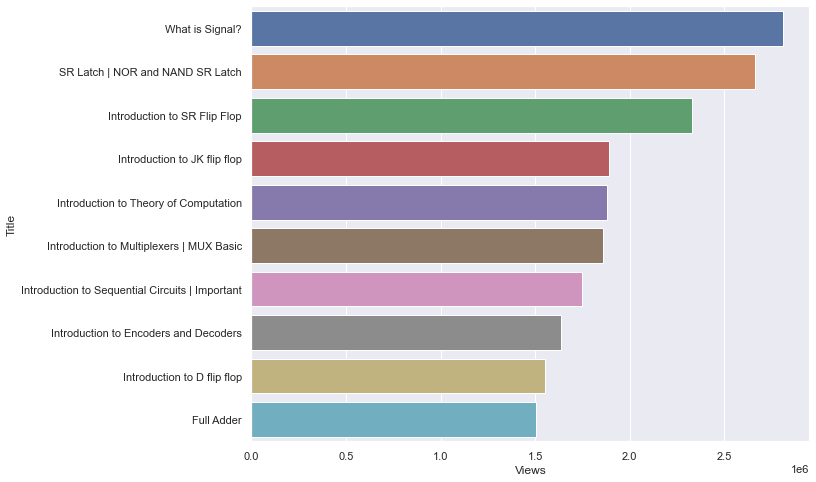

In [28]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [29]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [30]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,Lexical Analyzer (Solved Problems) - Set 1,2022-04-16,1306,30,0,Apr
1,Lexical Analyzer – Tokenization,2022-04-14,3249,70,5,Apr
2,Introduction to Microsoft Excel,2022-04-10,14238,426,30,Apr
3,Introduction to Lexical Analyzer,2022-04-08,4116,85,9,Apr
4,Symbol Table – Solved PYQs,2022-04-05,4649,56,7,Apr
...,...,...,...,...,...,...
2206,Karnaugh Map (K' Map) - Part 1,2014-09-02,1315040,15323,695,Sep
2207,Gray Code to Binary & Binary to Gray Code conv...,2014-08-29,147275,849,86,Aug
2208,Excess 3 Code (XS 3 Code) Old,2014-08-29,68073,266,13,Aug
2209,Binary Coded Decimal (BCD Code),2014-08-29,243978,1180,62,Aug


In [31]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [32]:
videos_per_month

,Month,size
0,Apr,217
1,Aug,193
2,Dec,149
3,Feb,136
4,Jan,178
5,Jul,208
6,Jun,185
7,Mar,224
8,May,207
9,Nov,157


In [33]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [34]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [35]:
videos_per_month = videos_per_month.sort_index()

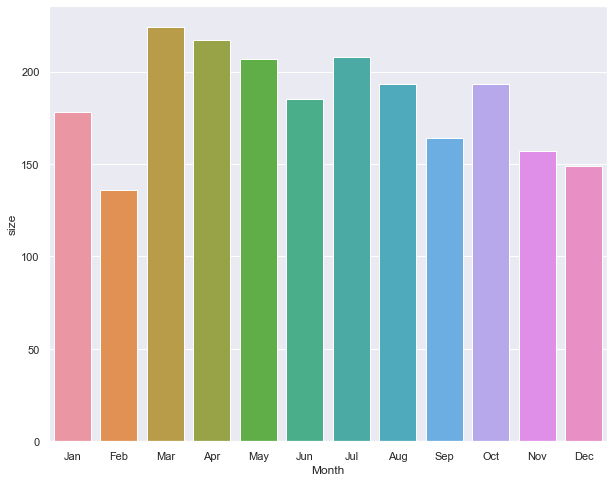

In [36]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [37]:
video_data.to_csv('Video_Details(Neso Academy).csv')

# Author : Kaustubh Dwivedi (VIT Vellore : 2019-2023)